In [1]:
import torch
import numpy as np
import matplotlib.pylab  as plt
from mpl_toolkits.mplot3d import Axes3D
from train import Net
from Data import ShapeNet_2048
from torch_geometric.data import DataLoader
%matplotlib inline

In [22]:
path = '../data/shapenet_2048/'
batch_size = 32
dataset = ShapeNet_2048(path, split='trainval',categories='Chair')
device = torch.device('cpu')
model = Net().to(device)
test_loader = DataLoader(
    dataset, batch_size=batch_size, shuffle=False, num_workers=1)
model.load_state_dict(torch.load('./pointAECh40.pt',map_location=device))

<All keys matched successfully>

In [23]:
gen_data = {
    'pred': np.empty([len(dataset),2048,3]),
    'true': np.empty([len(dataset),2048,3])
}
model.eval()
for i,data in enumerate(test_loader):
    data = data.to(device)
    with torch.no_grad():
        begin = i*batch_size
        end = begin +data.category.size(0)
        gen_data['pred'][begin:end] = model(data).cpu().numpy().reshape((-1,2048,3))
        gen_data['true'][begin:end] = data.x.cpu().numpy().reshape((-1,2048,3)) 

KeyboardInterrupt: 

In [24]:
i

13

In [25]:
def plot_3d_point_cloud(x, y, z, show=True, show_axis=True, in_u_sphere=False, marker='.', s=8, alpha=.8, figsize=(15, 7), elev=20, azim=60, axis=None, title=None, *args, **kwargs):

    if axis is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')        
    else:
        ax = axis
        fig = axis

    if title is not None:
        plt.title(title)

    sc = ax.scatter(x, y, z, marker=marker, s=s, alpha=alpha, *args, **kwargs)
    ax.view_init(elev=elev, azim=azim)

    if in_u_sphere:
        ax.set_xlim3d(-0.5, 0.5)
        ax.set_ylim3d(-0.5, 0.5)
        ax.set_zlim3d(-0.5, 0.5)
    else:
        miv = 0.7 * np.min([np.min(x), np.min(y), np.min(z)])  # Multiply with 0.7 to squeeze free-space.
        mav = 0.7 * np.max([np.max(x), np.max(y), np.max(z)])
        ax.set_xlim(miv, mav)
        ax.set_ylim(miv, mav)
        ax.set_zlim(miv, mav)
        plt.tight_layout()

    if not show_axis:
        plt.axis('off')

    if 'c' in kwargs:
        plt.colorbar(sc)

    if show:
        plt.show()

    return fig

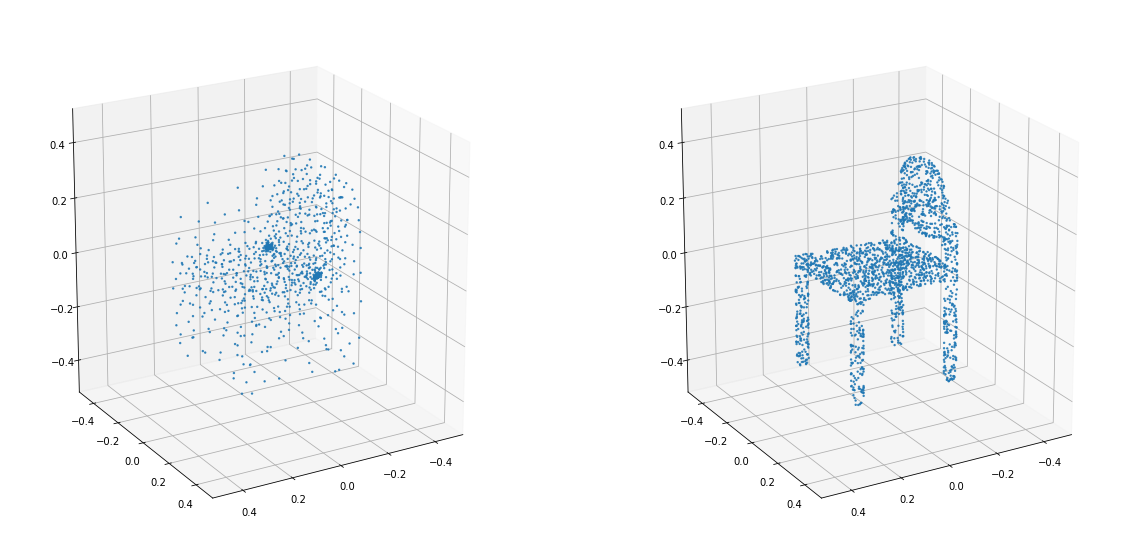

In [29]:
fig = plt.figure(figsize=(20,10))
ax_pred = fig.add_subplot(121, projection='3d')
ax_true = fig.add_subplot(122, projection='3d')
num = 6
plot_3d_point_cloud(gen_data['pred'][num][:,0], 
                    gen_data['pred'][num][:,1], 
                    gen_data['pred'][num][:,2], in_u_sphere=True,axis=ax_pred,show=False);
plot_3d_point_cloud(gen_data['true'][num][:,0], 
                    gen_data['true'][num][:,1], 
                    gen_data['true'][num][:,2], in_u_sphere=True,axis=ax_true,show=False);

In [39]:
gen_data['pred'][2]

array([[-0.09598553, -0.14204367,  0.00341753],
       [-0.17661704,  0.19744305,  0.30368167],
       [-0.1214764 ,  0.10764313,  0.01244972],
       ...,
       [-0.1278131 ,  0.02679743,  0.00422678],
       [-0.09787244,  0.12770763,  0.00044276],
       [ 0.22807279,  0.25768346, -0.10707775]])

In [36]:
gen_data['true'][num]

array([[ 0.19124861, -0.17480877, -0.3334671 ],
       [ 0.21362783, -0.18574134, -0.33163881],
       [ 0.18746641,  0.20205005, -0.33090505],
       ...,
       [-0.10580311,  0.24086207,  0.33219776],
       [-0.08345493, -0.24388434,  0.3323628 ],
       [-0.07146212,  0.24227874,  0.3334671 ]])